In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Question 1** Number of Additions and Multiplications required while performing Multiplication of Matrices $M_{n \times k}$ and $N_{k \times m}$ <br> Matrix $M$ and $N$ can be represented as:

\begin{equation}
M_{n \times k} = \begin{bmatrix}
   M_{11} & M_{12} & \cdots & M_{1k} \\
   M_{21} & M_{22} & \cdots & M_{2k} \\
   \vdots  & \vdots  & \ddots & \vdots  \\
   M_{n1} & M_{n2} & \cdots & M_{nk}
 \end{bmatrix}
\end{equation}

\begin{equation}
N_{k \times m} = \begin{bmatrix}
   N_{11} & N_{12} & \cdots & N_{1m} \\
   N_{21} & N_{22} & \cdots & N_{2m} \\
   \vdots  & \vdots  & \ddots & \vdots  \\
   N_{k1} & N_{k2} & \cdots & N_{km}
 \end{bmatrix}
\end{equation}

The resultant matrix $R$ has dimensions of $n \times m$. In total all of the $nm$ entries in the resultant matrix are calculated as follows:<br>
$R_{ij} = M_{i1}N_{1j} + M_{i2}N_{2j} + \cdots + M_{ik}N_{kj}$ which can be simplified as <br>
$R_{ij} = \sum_{p=1}^{k}M_{ip} N_{pj}$ <br>
Each calculate each element in the matrix we'll have to perform $k$ multiplications and $k - 1$ addiions and since there are $nm$ elements, therefore we'll have $nmk$ multiplications and $nm(k - 1)$ additions.



## **Question 2** Matrix Multiplication Implementation and Comparision

In [ ]:
def matrix_multiplication(M, N):
    n = len(M)
    k = len(N)
    m = len(N[0])
    R = np.zeros((n, m)) # initialising with an empty array of the size n x m
    for i in range(n):
        for j in range(m):
            for l in range(k):
                R[i, j] += M[i, l] * N[l, j]
    return R

M = np.array([[4, 1, 7],
    [4, 6, 1],
    [0, 9, 1],
    [9, 5, 6]])

N = np.array([[5, 6],
    [1, 7],
    [0, 0]])

R = matrix_multiplication(M, N)

R_inbuilt = np.dot(M, N)
print("Matrix M:\n")
print(M)
print()
print("Matrix N:\n")
print(N)
print()
print("Matrix R:\n")
print(R)
print()
print(R_inbuilt)

Matrix M:

[[4 1 7]
 [4 6 1]
 [0 9 1]
 [9 5 6]]

Matrix N:

[[5 6]
 [1 7]
 [0 0]]

Matrix R:

[[21. 31.]
 [26. 66.]
 [ 9. 63.]
 [50. 89.]]

[[21 31]
 [26 66]
 [ 9 63]
 [50 89]]


### Time Comparision
Alot of the Linear Algebra operations in numpy are pre-computed, highly optimised functions written in $C$ or $Fortran$, so while calling calling them its executing a single, fast operation in a compiled langiage. Whereas, the list-of-lists aproach uses nested loops which causes increase in time since python is an interpreted language (line-by-line execution) which means there is significant overhead for every calculation (memory management, object type checking, etc.) which adds up for large number of calculations.

In [ ]:
# Generating Random matrices
n, k, m = 110, 75, 50
M = np.random.randint(10, size=(n, k))
N = np.random.randint(10, size=(k, m))

%time R = matrix_multiplication(M, N)
%time R_inbuilt = np.dot(M, N)

CPU times: user 203 ms, sys: 0 ns, total: 203 ms
Wall time: 203 ms
CPU times: user 635 µs, sys: 0 ns, total: 635 µs
Wall time: 385 µs


## **Question 3** Median

### **Method 1**:
Checking for an element would be an $O(N)$ operation for each pass, since we need to find the median that means the $\frac{N}{2}^{th}$ largest element, resulting in an overall complexity of $O(N^2)$.


In [22]:
def find_median(arr):
  n = len(arr)
  for i in range(n - 1, n//2 - 2, -1):
    maxidx = i
    for j in range(i):
      if arr[j] > arr[maxidx]:
        maxidx = j
    arr[maxidx], arr[i] = arr[i], arr[maxidx]
  if N % 2 == 1:
    print(arr[maxidx])
  else:
    print((arr[n//2] + arr[n//2 - 1])/2)


### **Method 2**
We can simply sort the array and return the median (middle element) resulting in an $O(NlogN)$ complexity.

In [18]:
def findmedian(arr):
  n = len(arr)
  sortedA = sorted(arr)
  if (N % 2 == 1):
    print(sortedA[n//2])
  else:
    print((sortedA[n//2] + sortedA[n//2 - 1])/2)

In [23]:
# testing
N = 30
arr = np.random.randint(256, size = N);
print(arr)
find_median(arr)
findmedian(arr)

[152 195 110 214 191 118 120 250 107  71  72 136 118  50  53  76 166 132
  62 100  19 112  35 130  76  81  68 158 151  80]
111.0
111.0


### Time Comparison

In [25]:
N = 9999
arr = np.random.randint(10000, size = N)
%time find_median(arr.copy())
%time findmedian(arr.copy())
%time np.median(arr.copy())

1734
CPU times: user 5.2 s, sys: 0 ns, total: 5.2 s
Wall time: 5.21 s
5011
CPU times: user 6.22 ms, sys: 0 ns, total: 6.22 ms
Wall time: 6.25 ms
CPU times: user 201 µs, sys: 0 ns, total: 201 µs
Wall time: 205 µs


np.float64(5011.0)

As seen above, the ```numpy.median``` method is faster than the methods implemented above, this is simply due to the fact that numpy operations are implemented in C and are much more optimised.

 ## **Question 4** Gradient with respect to $x$ and $y$ <br>
The function $F(x, y)$ is defined as $x^{2}y + y^{3}sinx$ <br>
The gradient of the $F(x,y)$ defined as $∇F$ is given as:<br>
$∇F = \begin{bmatrix}\frac{\partial F}{\partial x} \\ \frac{\partial F}{\partial y} \end{bmatrix} = \begin{bmatrix} 2xy + y^3 \cos(x) \\ x^2 + 3y^2 \sin(x)  \end{bmatrix}$

## **Question 5** Using ```JAX``` to find the Gradient

In [5]:
import jax
import jax.numpy as jnp

In [9]:
def F(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

def grad_F(x, y):
  return jnp.array(jax.grad(F, argnums = (0, 1))(x, y))

def manual_grad_F(x, y):
  return jnp.array([2*x*y + y**3*jnp.cos(x), x**2 + 3*y**2*jnp.sin(x)])

points = np.array([(0, 0), (1, 1), (0.5, 0.5), (2, -2), (0.25, -1)])

for x, y in points:
  jaxgrad = grad_F(x, y)
  manualgrad = manual_grad_F(x, y)
  print("Jaxgrad: ", jaxgrad)
  print("Manualgrad: ", manualgrad)

Jaxgrad:  [0. 0.]
Manualgrad:  [0. 0.]
Jaxgrad:  [2.5403023 3.5244129]
Manualgrad:  [2.5403023 3.5244129]
Jaxgrad:  [0.6096978 0.6095692]
Manualgrad:  [0.6096978 0.6095692]
Jaxgrad:  [-4.670825 14.911569]
Manualgrad:  [-4.670825 14.911569]
Jaxgrad:  [-1.4689124  0.8047119]
Manualgrad:  [-1.4689124  0.8047119]


As seen the results are almost the same using ```Jax``` or through the manual method.

## **Question 6** Using ```sympy``` to find the gradient of the function



In [1]:
import sympy as sp

In [4]:
x, y = sp.symbols("x y")
F = x**2 * y + y**3 * sp.sin(x)
gradx, grady = sp.diff(F, x), sp.diff(F, y)
print("Gradient wrt x:")
display(gradx)
print("Gradient wrt y:")
display(grady)


Gradient wrt x:


2*x*y + y**3*cos(x)

Gradient wrt y:


x**2 + 3*y**2*sin(x)

## **Question 7** Nested Dictionary

In [13]:
students = {
    2022:
    {
        "Branch 1":
        {
            1:{
              "Roll Number": 1,
              "Name": "N",
              "Marks":
              {
                  "Maths": 100,
                  "English": 70,
              }
            }
        },
        "Branch 2":
        {

        }

    },
    2023:
    {
        "Branch 1":
        {

        },
        "Branch 2":
        {

        }
    },
    2024:
    {
        "Branch 1":
        {

        },
        "Branch 2":
        {

        }
    },
    2025:
    {
        "Branch 1":
        {

        },
        "Branch 2":
        {

        }
    }
}

for year in students:
    print(f"Year: {year}")
    for branch in students[year]:
        print(" "*4, f"Branch: {branch}")
        for roll in students[year][branch]:
            print(" "*8,f"Student: {roll}")
            print(" "*12 ,f"Name: {students[year][branch][roll]['Name']}")
            print(" "*12, f"Roll Number: {students[year][branch][roll]['Roll Number']}")
            print(" "*12,"Marks:")
            for indimarks in students[year][branch][roll]['Marks']:
                print(" "*16, f"{indimarks}: {students[year][branch][roll]['Marks'][indimarks]}")
    print()

Year: 2022
     Branch: Branch 1
         Student: 1
             Name: N
             Roll Number: 1
             Marks:
                 Maths: 100
                 English: 70
     Branch: Branch 2

Year: 2023
     Branch: Branch 1
     Branch: Branch 2

Year: 2024
     Branch: Branch 1
     Branch: Branch 2

Year: 2025
     Branch: Branch 1
     Branch: Branch 2



## **Question 8** Python Classes

In [15]:
class Student_Data:
    def __init__(self, name, roll_number):
        self.name = name
        self.roll_number = roll_number
        self.marks = {}

    def uploadmarks(self, subject, marks):
        self.marks[subject] = marks


class Branch:
    def __init__(self, brnumber):
        self.number = brnumber
        self.students = []

    def addstudents(self, student):
        self.students.append(student)


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def addbranch(self, branch):
        self.branches.append(branch)

    def print(self):
        print(f"Year: {self.year}")
        for branch in self.branches:
            print(" " * 4, f"Branch: Branch {branch.number}")
            for student in branch.students:
                print(" " * 8, f"Student: {student.roll_number}")
                print(" " * 12, f"Name: {student.name}")
                print(" " * 12, f"Roll Number: {student.roll_number}")
                print(" " * 12, "Marks:")
                for subject, marks in student.marks.items():
                    print(" " * 16, f"{subject}: {marks}")
            print()

In [17]:
y2022 = Year(2022)
b12022 = Branch(2022)
stud2022 = Student_Data("N", 1)
stud2022.uploadmarks("Maths", 100)
stud2022.uploadmarks("English", 70)
b12022.addstudents(stud2022)

y2022.addbranch(b12022)
b22022 =  Branch(2)
y2022.addbranch(b22022)

y2023 = Year(2023)
b12022 = Branch(1)
b22022 = Branch(2)

y2023.addbranch(b12022)
y2023.addbranch(b22022)

y2024 = Year(2024)
b12022 = Branch(1)
b22022 = Branch(2)
y2024.addbranch(b12022)
y2024.addbranch(b22022)

y2025 = Year(2025)
b52025 = Branch(5)
b52025 = Branch(1)
b52022 = Branch(2)
y2025.addbranch(b52022)
y2025.addbranch(b52022)

y2022.print()
y2023.print()
y2024.print()
y2025.print()

Year: 2022
     Branch: Branch 2022
         Student: 1
             Name: N
             Roll Number: 1
             Marks:
                 Maths: 100
                 English: 70

     Branch: Branch 2

Year: 2023
     Branch: Branch 1

     Branch: Branch 2

Year: 2024
     Branch: Branch 1

     Branch: Branch 2

Year: 2025
     Branch: Branch 2

     Branch: Branch 2



## **Question 9** Plotting various functions in ```matplotplib```

1. $y = x$
2. $y = x^2$
3. $y = \frac{x^3}{100}$
4. $y = \sin(x)$
5. $y = \frac{\sin(x)}{x}$
6. $y = \log(x)$
7. $y = e^x$

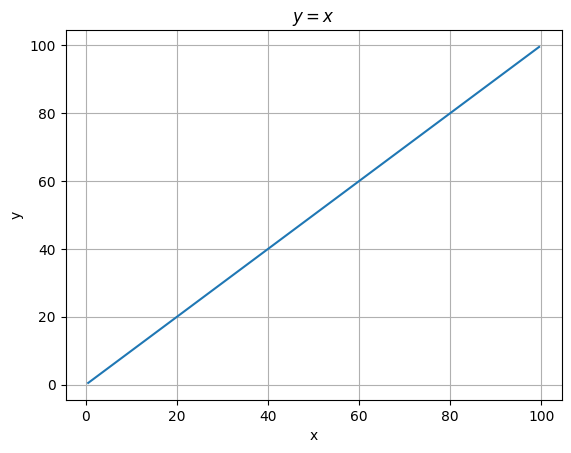

In [12]:
x = np.arange(0.5, 100, 0.5)
y = x
plt.plot(x, y)
plt.title ("$y = x$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

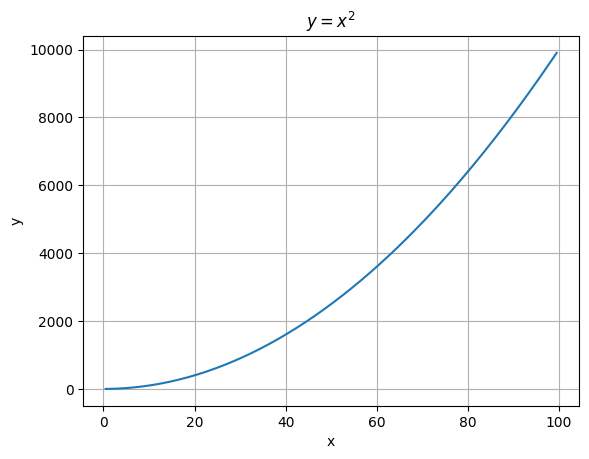

In [11]:
y = x**2
plt.plot(x, y)
plt.title ("$y = x^{2}$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

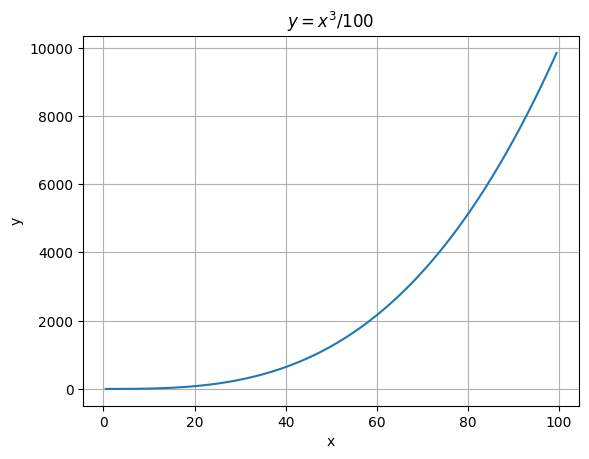

In [13]:
y = (x**3)/100
plt.plot(x, y)
plt.title ("$y = x^{3}/100$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

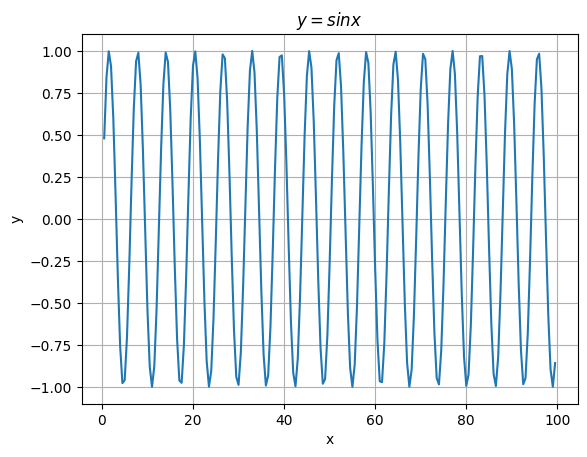

In [15]:
y = np.sin(x)
plt.plot(x, y)
plt.title ("$y = sinx$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

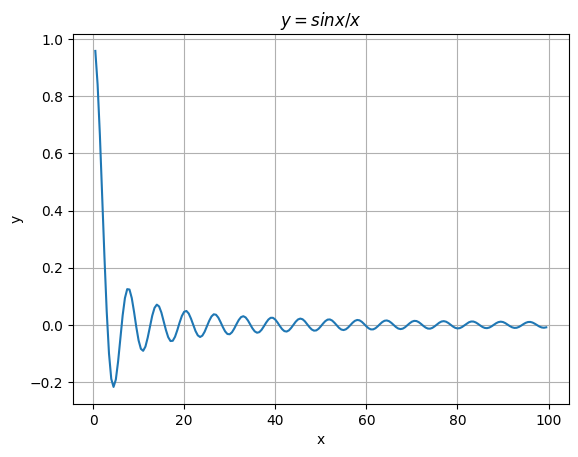

In [16]:
y = np.sin(x)/x
plt.plot(x, y)
plt.title ("$y = sinx/x$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

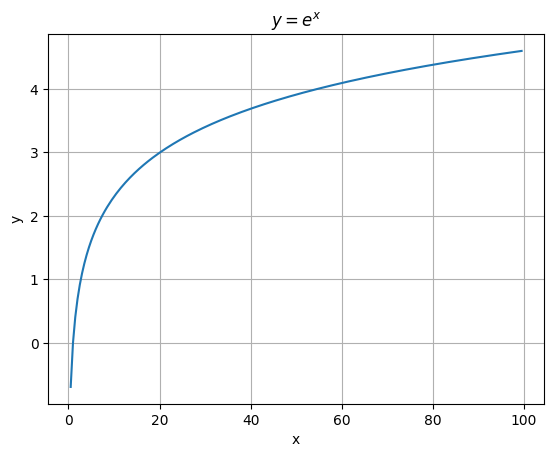

In [18]:
y = np.log(x)
plt.plot(x, y)
plt.title ("$y = logx$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

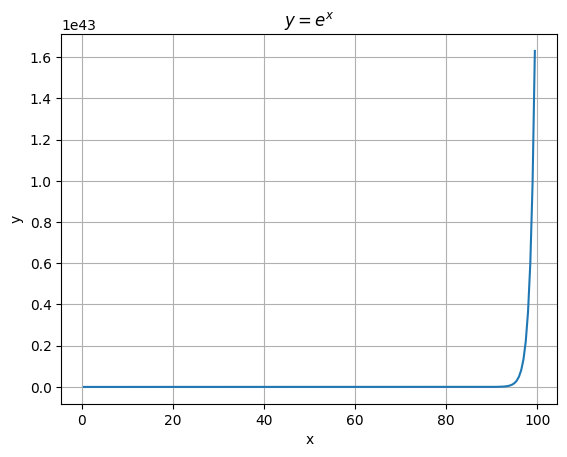

In [19]:
y = np.exp(x)
plt.plot(x, y)
plt.title ("$y = e^{x}$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## **Question 10** Matrices in Pandas

In [20]:
M = np.random.uniform(1, 2, (20, 5))
M

array([[1.61956771, 1.16205427, 1.29187622, 1.38504025, 1.27578187],
       [1.26678813, 1.59057338, 1.51363438, 1.86631655, 1.7389998 ],
       [1.51297033, 1.20752711, 1.90738007, 1.54246098, 1.6574213 ],
       [1.88809481, 1.34872463, 1.88548352, 1.77711558, 1.30069844],
       [1.88915721, 1.95060101, 1.8761085 , 1.30464151, 1.16695631],
       [1.30000133, 1.91481337, 1.54689566, 1.88050241, 1.80003946],
       [1.00560173, 1.64357781, 1.16560198, 1.39176885, 1.98626507],
       [1.10666795, 1.62080794, 1.67204936, 1.07477782, 1.96352587],
       [1.87046008, 1.36036341, 1.05224421, 1.57035856, 1.08748121],
       [1.79459119, 1.37914968, 1.08246173, 1.07101902, 1.67262324],
       [1.36993527, 1.44366409, 1.0347772 , 1.85440735, 1.48699135],
       [1.53860089, 1.73029301, 1.65494641, 1.08060743, 1.45584092],
       [1.99849888, 1.93929754, 1.14771323, 1.38096519, 1.33711636],
       [1.21944036, 1.70550312, 1.43311218, 1.22152348, 1.65981627],
       [1.58418159, 1.50254571, 1.

In [21]:
df = pd.DataFrame(M, columns = ["A", "B", "C", "D", "E"])
df

,A,B,C,D,E
0,1.619568,1.162054,1.291876,1.385040,1.275782
1,1.266788,1.590573,1.513634,1.866317,1.739000
2,1.512970,1.207527,1.907380,1.542461,1.657421
3,1.888095,1.348725,1.885484,1.777116,1.300698
4,1.889157,1.950601,1.876108,1.304642,1.166956
5,1.300001,1.914813,1.546896,1.880502,1.800039
6,1.005602,1.643578,1.165602,1.391769,1.986265
7,1.106668,1.620808,1.672049,1.074778,1.963526
8,1.870460,1.360363,1.052244,1.570359,1.087481
9,1.794591,1.379150,1.082462,1.071019,1.672623


### Column with highest standard deviation

In [22]:
maxstd = df.std().idxmax()
maxstd

'A'

### Row with lowest row

In [23]:
df.mean(axis = 1).idxmin()

17

## **Question 11** Adding Columns

In [24]:
df["f"] = df.sum(axis = 1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
df

,A,B,C,D,E,f,g
0,1.619568,1.162054,1.291876,1.385040,1.275782,6.734320,LT8
1,1.266788,1.590573,1.513634,1.866317,1.739000,7.976312,LT8
2,1.512970,1.207527,1.907380,1.542461,1.657421,7.827760,LT8
3,1.888095,1.348725,1.885484,1.777116,1.300698,8.200117,GT8
4,1.889157,1.950601,1.876108,1.304642,1.166956,8.187465,GT8
5,1.300001,1.914813,1.546896,1.880502,1.800039,8.442252,GT8
6,1.005602,1.643578,1.165602,1.391769,1.986265,7.192815,LT8
7,1.106668,1.620808,1.672049,1.074778,1.963526,7.437829,LT8
8,1.870460,1.360363,1.052244,1.570359,1.087481,6.940907,LT8
9,1.794591,1.379150,1.082462,1.071019,1.672623,6.999845,LT8


### Number of rows in "g" having column values "LT8"

In [26]:
number_of_rows = (df["g"] == "LT8").sum()
print(number_of_rows)

14


### Standard Deviation of the column "f" for the values in "g" is "LT8"

In [27]:
stdev_conditional = np.std(df["f"][df["g"] == "LT8"])
stdev_conditional

0.3917679689872138

### Standard Deviation of the column "f" for the values in "g" is "GT8"

In [28]:
stdev_conditional2 = np.std(df["f"][df["g"] == "GT8"])
stdev_conditional2

0.11465705508323128

## **Question 12** Broadcasting in ```Numpy```
### Broadcasting is a powerful numpy feature for arithmetic operations between arrays of different shapes. The smaller array is streched or broadcasted across the larger array to make their shapes compatible

In [51]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([10, 20, 30])

print("Array 'a' (shape {}):".format(a.shape))
print(a)
print("\nArray 'b' (shape {}):".format(b.shape))
print(b)

c = a + b

print("\nResult of a + b (shape {}):".format(c.shape))
print(c)

Array 'a' (shape (3, 3)):
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array 'b' (shape (3,)):
[10 20 30]

Result of a + b (shape (3, 3)):
[[11 22 33]
 [14 25 36]
 [17 28 39]]


As seen in the above example the shape for both the arrays are different but we are still able to add the arrays, this happens because of broadcasting, the array which is smaller in size which is array b in the above example is streched and added to a.

In [52]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([10, 20, 30])

print("Array 'a' (shape {}):".format(a.shape))
print(a)
print("\nArray 'b' (shape {}):".format(b.shape))
print(b)

c = a * b

print("\nResult of a * b (shape {}):".format(c.shape))
print(c)

Array 'a' (shape (3, 3)):
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array 'b' (shape (3,)):
[10 20 30]

Result of a * b (shape (3, 3)):
[[ 10  40  90]
 [ 40 100 180]
 [ 70 160 270]]


Similar thing happens with multiplication

In [55]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

b = np.array([10, 20, 30])

print("Array 'a' (shape {}):".format(a.shape))
print(a)
print("\nArray 'b' (shape {}):".format(b.shape))
print(b)

c = b / a

print("\nResult of b / a (shape {}):".format(c.shape))
print(c)

Array 'a' (shape (3, 3)):
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array 'b' (shape (3,)):
[10 20 30]

Result of b / a (shape (3, 3)):
[[10.         10.         10.        ]
 [ 2.5         4.          5.        ]
 [ 1.42857143  2.5         3.33333333]]


## **Question 13** ```argmin``` of an array

In [46]:
def argminf(M):
  n = len(M)
  minele = M[0];
  for i in range(n):
    if minele >= M[i]:
      minele = M[i]
      minindex = i
  return minindex

# if array is 1D
arr = np.random.randint(1, 64, size = 20)
display(arr)
print()
# if array is not 1D, then we'll flatten it
arrn = np.random.randint(1, 64, size = [5, 3, 2])
display(arrn)
print()
arrn.flatten()

array([26, 11, 46,  4, 59,  7, 32, 30, 44,  6, 50,  9, 44, 61, 43, 26, 44,
        6,  9, 47])

array([[[22, 13],
        [ 2, 43],
        [27, 25]],

       [[25, 50],
        [20, 21],
        [46,  3]],

       [[55, 60],
        [21, 14],
        [61, 37]],

       [[ 3, 55],
        [ 6, 53],
        [63, 30]],

       [[60, 34],
        [60, 63],
        [48, 18]]])

array([22, 13,  2, 43, 27, 25, 25, 50, 20, 21, 46,  3, 55, 60, 21, 14, 61,
       37,  3, 55,  6, 53, 63, 30, 60, 34, 60, 63, 48, 18])

In [50]:
print("For 1D array, the minimum index is")
display(argminf(arr))
print("For 1D array using the argmin function:")
print(np.argmin(arr))
print()
print("For any array other than 1D the min arg after flattening is:")
print(argminf(arrn.flatten()))
print("For any array other than 1D the min arg using the argmin function is:")
print(np.argmin(arrn))

For 1D array, the minimum index is


3

For 1D array using the argmin function:
3

For any array other than 1D the min arg after flattening is:
2
For any array other than 1D the min arg using the argmin function is:
2
